<a href="https://colab.research.google.com/github/deadSEKTR/DielectronAnalysis/blob/main/LHC_CMS_Dielectron_Event_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Statistical Inquiry into 100K Di-electron Collision Events from the Compact Muon Solenoid (CMS) experiment at CERN Large Hadron Collider (LHC) | Shreyan Chaubey**


The following analysis investigates a dataset of 100,000 di-electron collision events in the invariant mass range 2-110 GeV, sampled from a larger set of Proton-Proton collision data collected by the Compact Muon Solenoid (CMS) experiment at CERN-LHC during the run-B of 2010.


**Note: This investigation was motivated primarily by the author's interest in Particle & Collider Physics and is based on a derived dataset sampled from the primary Run-B data obtained during the 2010 beam (aka, the first post-repair commisioned beam). This sample has been curated for educational purposes and is in no way suitable & intended for a formal and rigorous research into the discipline. The reader must be mindful before drawing any conclusions from the results of this inquiry.**

# **Data Preparation**
## Pipelining data from the CERN Open Data portal
The dataset of dielectron collision events from the CMS experiment is loaded directly from CERN's Open Data Portal. The initial steps involve importing necessary libraries, loading the dataset into a pandas DataFrame, and verifying the integrity of the dataset by checking for missing values and cleaning the column names to ensure consistency. This preparation phase is crucial for accurate and reliable analysis.

In [14]:
import requests

# Generate the download URL
url = "https://opendata.cern.ch/record/304/files/dielectron.csv"

# Send a GET request to the URL and save the response to a file
response = requests.get(url)
with open('dielectron.csv', 'wb') as f:
    f.write(response.content)

In [15]:
import pandas as pd
import numpy as np

dielectron_df = pd.read_csv('dielectron.csv')
print(dielectron_df)

          Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")


## Pre-processing and Validation

The dataset consists of various columns representing different physical properties of the electrons involved in the collision events. The ***Run*** and ***Event*** columns uniquely identify each event, while columns such as ***E1, px1, py1, pz1, pt1, eta1, phi1, Q1*** provide detailed information about the first electron. Similarly, ***E2, px2, py2, pz2, pt2, eta2, phi2, Q2*** provide information about the second electron. The ***M*** column represents the invariant mass of the electron pair

In [17]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dielectron_df.head())
print("\n" + "="*50 + "\n")

# Display the summary of the dataset
print("Summary of the dataset:")
dielectron_df.info()
print("\n" + "="*50 + "\n")

# Display summary statistics
print("Summary statistics of the dataset:")
print(dielectron_df.describe())
print("\n" + "="*50 + "\n")



First few rows of the dataset:
      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8

## Checking for Missing Values

In [18]:
# Check for missing values
missing_values = dielectron_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print("\n" + "="*50 + "\n")

Missing values in each column:
Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64




The dataset is well-structured, and preliminary inspection confirms the absence of missing values in all columns, except for a few (85) instances in *M* which we fill with the mean. We have the option to remove the rows with missing values, but we choose to fill them with the mean.

In [19]:
# Inspect rows with missing values in the 'M' column
missing_m = dielectron_df[dielectron_df['M'].isnull()]
print("Rows with missing values in the 'M' column:")
print(missing_m.head())
print("\n" + "="*50 + "\n")

# Option 1: Remove rows with missing values in the 'M' column
# dielectron_df_cleaned = dielectron_df.dropna(subset=['M'])
# print("Dataset after removing rows with missing values in the 'M' column:")
# print(dielectron_df_cleaned.info())
# print("\n" + "="*50 + "\n")

# Option 2: Fill missing values in the 'M' column with the mean of the column
dielectron_df['M'].fillna(dielectron_df['M'].mean(), inplace=True)
print("Dataset after filling missing values in the 'M' column with mean value:")
print(dielectron_df.info())
print("\n" + "="*50 + "\n")

Rows with missing values in the 'M' column:
         Run      Event        E1       px1        py1        pz1       pt1  \
2354  147115  626787667   2.55245   0.783675  -2.42902  -0.026877   2.55231   
4428  147115  222901013   2.53785  -1.024290  -1.94845  -1.262950   2.20128   
5035  147115  251148678   2.91461   1.578570   2.33753   0.734179   2.82062   
6066  146644  908463569  19.89620 -11.256100  12.47620 -10.653800  16.80340   
6667  146644  588243059   3.61060  -1.635780  -2.64885  -1.828730   3.11323   

          eta1     phi1  Q1        E2       px2       py2        pz2  \
2354 -0.010530 -1.25871   1  14.27670   4.38735 -13.58510  -0.142737   
4428 -0.546171 -2.05479   1  22.00250  -8.88148 -16.89470 -10.945300   
5035  0.257437  0.97683  -1  16.58530   8.97739  13.30470   4.178960   
6066 -0.597779  2.30483  -1   2.41704  -1.36666   1.51671  -1.293790   
6667 -0.557996 -2.12402   1  26.11550 -11.83680 -19.16480 -13.214400   

           pt2      eta2      phi2  Q2   M  
235

Checking for missing values again gives us the following result,

In [20]:
# Check for missing values
missing_values = dielectron_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print("\n" + "="*50 + "\n")

Missing values in each column:
Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64




There are no missing values in column M anymore. Indicating that the dataset is now ready for further inspection.

# Preliminary Investigation

## Histogram of the invariant mass (M)
The histogram of the invariant mass (M) provides insights into the distribution of the invariant mass of the dielectron systems. The presence of peaks in the histogram can indicate resonances corresponding to known or potentially new particles. The invariant mass range of 2-110 GeV encompasses several well-known particles, such as the J/ψ meson and the Z boson. The distribution is critical for identifying potential new physics signals or confirming the presence of expected particles.

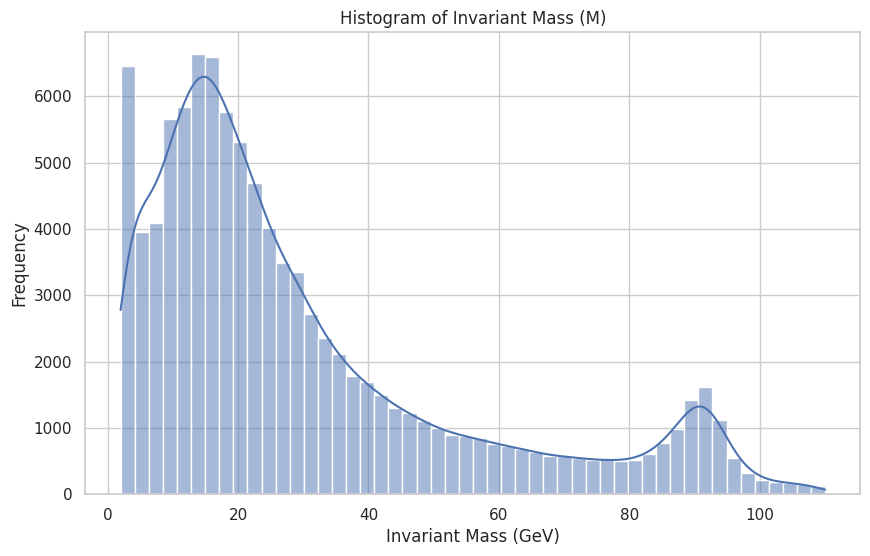

In [21]:
# Generating a histogram of invariant mass

plt.figure(figsize=(10, 6))
sns.histplot(dielectron_df['M'], bins=50, kde=True)
plt.title('Histogram of Invariant Mass (M)')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Frequency')
plt.show()


## Transverse Momentum Scatterplot

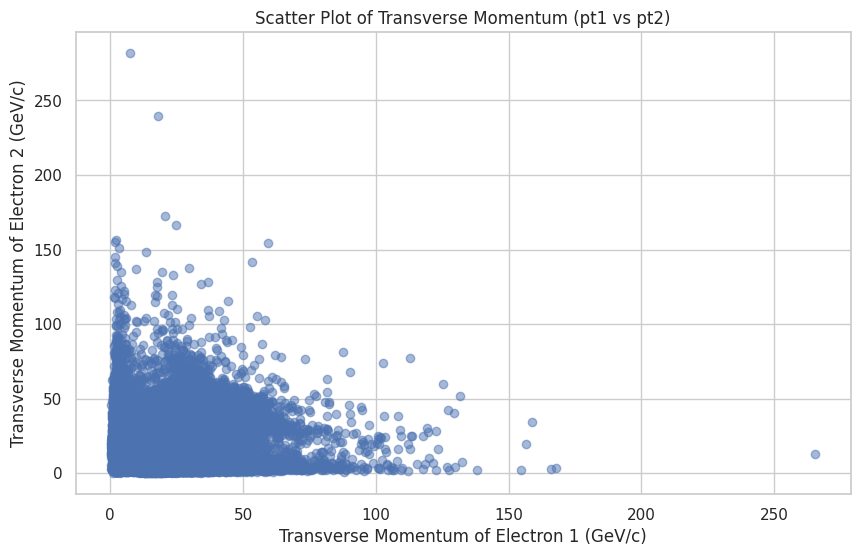

In [28]:
# Scatter plot for transverse momentums
plt.figure(figsize=(10, 6))
plt.scatter(dielectron_df['pt1'], dielectron_df['pt2'], alpha=0.5)
plt.title('Scatter Plot of Transverse Momentum (pt1 vs pt2)')
plt.xlabel('Transverse Momentum of Electron 1 (GeV/c)')
plt.ylabel('Transverse Momentum of Electron 2 (GeV/c)')
plt.show()


# Distribution of Psuedorapitiy (Eta1 & Eta2)

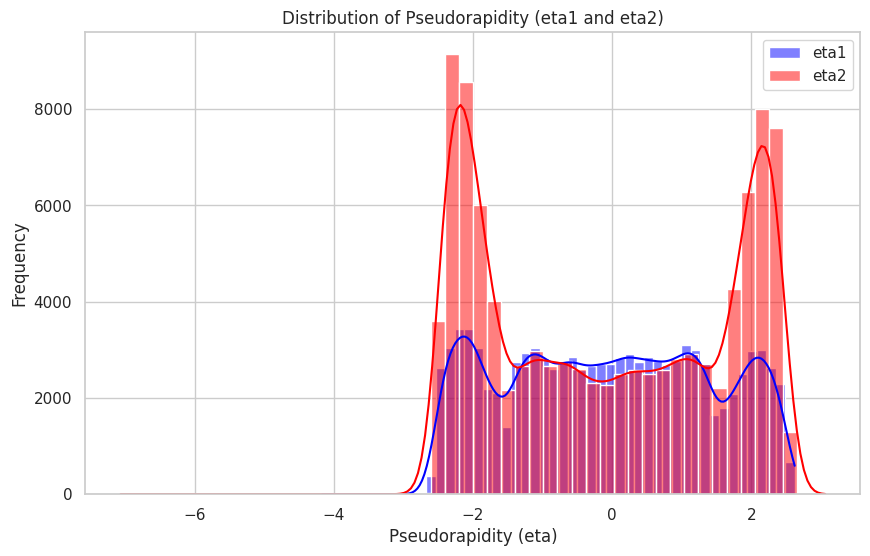

In [29]:
# Distribution of psuedorapidity (eta1 and eta2)
plt.figure(figsize=(10, 6))
sns.histplot(dielectron_df['eta1'], bins=50, color='blue', label='eta1', kde=True)
sns.histplot(dielectron_df['eta2'], bins=50, color='red', label='eta2', kde=True)
plt.title('Distribution of Pseudorapidity (eta1 and eta2)')
plt.xlabel('Pseudorapidity (eta)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Advanced Investigation**

## **Correlation Matrix**

The correlation matrix provides a comprehensive overview of the linear relationships between different variables in the dataset.

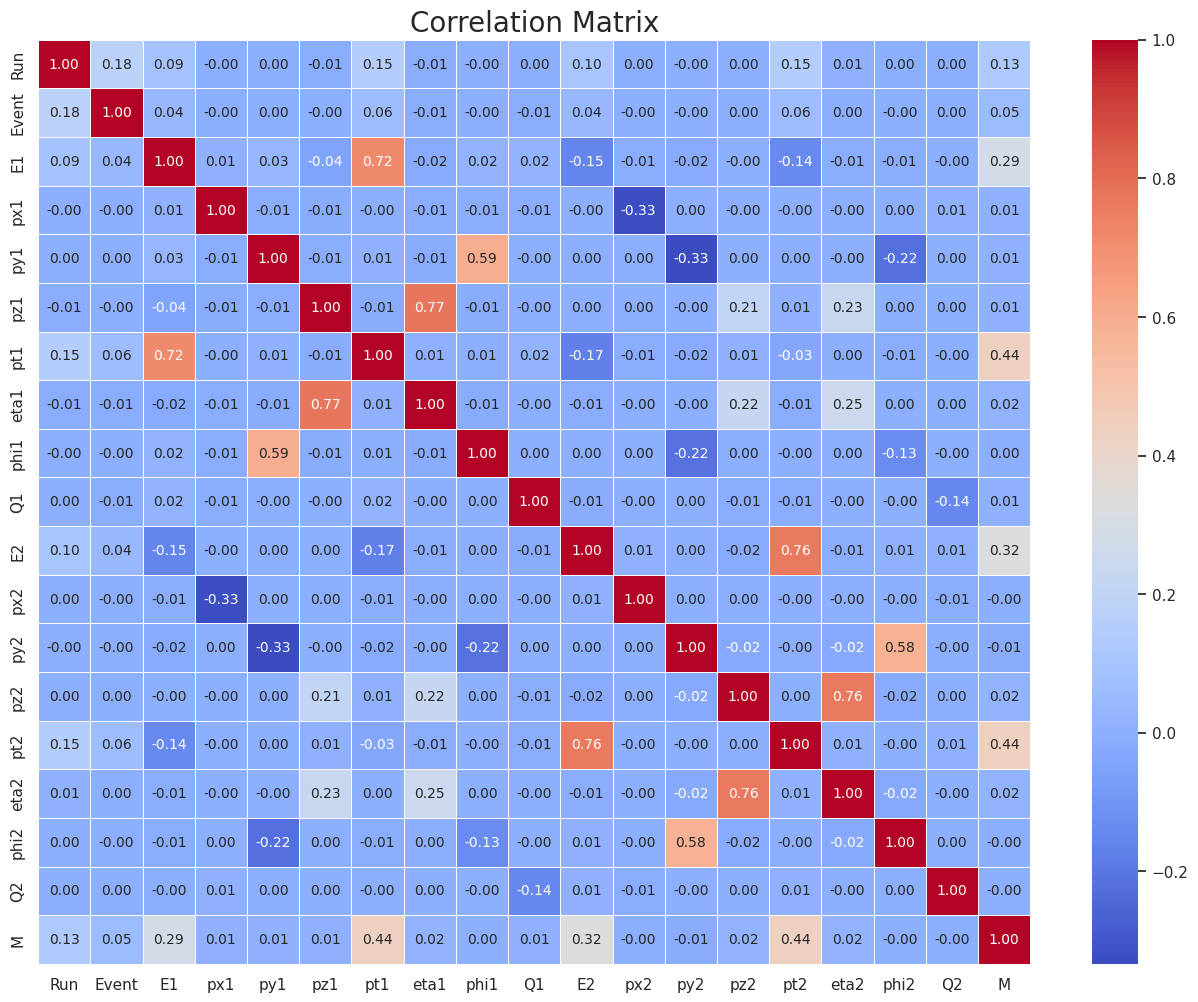

In [37]:
# Correlation matrix

# Set the figure size to be larger for better readability
plt.figure(figsize=(16, 12))

# Generate the correlation matrix
corr_matrix = dielectron_df.corr()

# Create a heatmap with annotations and a more readable color map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

# Add a title to the heatmap
plt.title('Correlation Matrix', fontsize=20)

# Display the plot
plt.show()




## **Key observations from the Correlation Matrix include:**

1. Strong positive correlations between the components of the momentum (px, py, pz) and the transverse momentum (pt) of each electron. This is expected, as these components collectively describe the momentum of the electron.
2. A significant correlation between the energy (E1 and E2) and the transverse momentum (pt1 and pt2) of each electron, reflecting the relationship between energy and momentum in relativistic particles.
3. Moderate correlations between the invariant mass (M) and the transverse momentum of the electrons, suggesting that higher invariant masses are generally associated with higher transverse momenta.
4. The charge (Q1 and Q2) shows no correlation with other kinematic variables, as expected, since the charge is an intrinsic property of the particle and does not depend on its momentum or energy.

## 3D Scatterplot for Momentum Vector Components

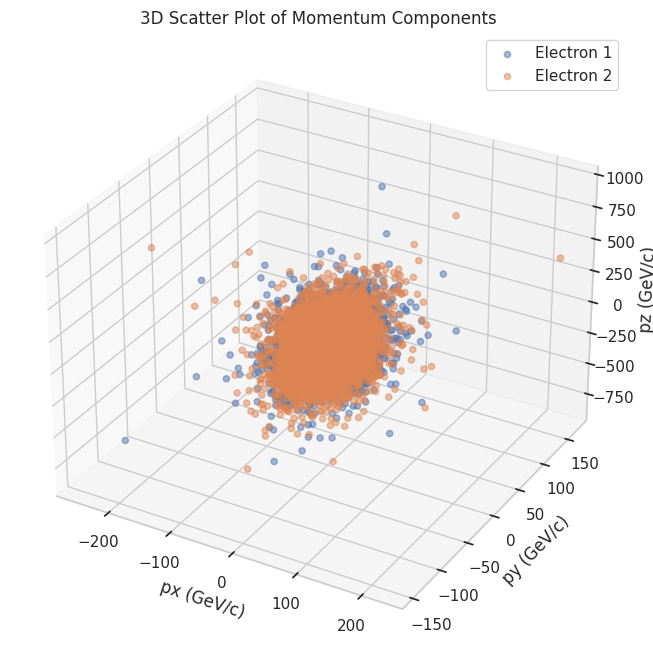

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Re-check and clean column names if necessary
dielectron_df.columns = dielectron_df.columns.str.strip()

# Generate the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dielectron_df['px1'], dielectron_df['py1'], dielectron_df['pz1'], alpha=0.5, label='Electron 1')
ax.scatter(dielectron_df['px2'], dielectron_df['py2'], dielectron_df['pz2'], alpha=0.5, label='Electron 2')
ax.set_title('3D Scatter Plot of Momentum Components')
ax.set_xlabel('px (GeV/c)')
ax.set_ylabel('py (GeV/c)')
ax.set_zlabel('pz (GeV/c)')
ax.legend()
plt.show()



# Invariant Mass vs. Transverse Momentum

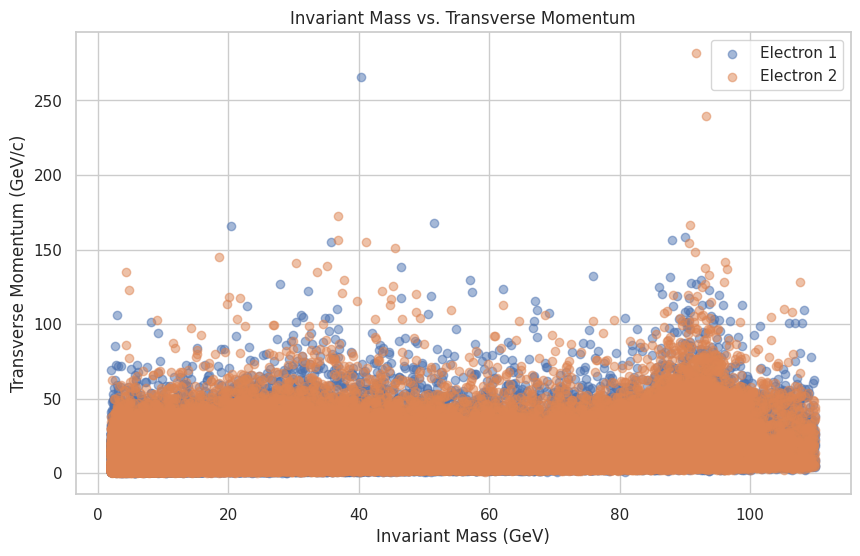

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(dielectron_df['M'], dielectron_df['pt1'], alpha=0.5, label='Electron 1')
plt.scatter(dielectron_df['M'], dielectron_df['pt2'], alpha=0.5, label='Electron 2')
plt.title('Invariant Mass vs. Transverse Momentum')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Transverse Momentum (GeV/c)')
plt.legend()
plt.show()
